# Task 2 - Prediction Using Unsupervised Machine Learning

Problem:

From given Iris data Predict the optimum number of clusters and represent it visually.

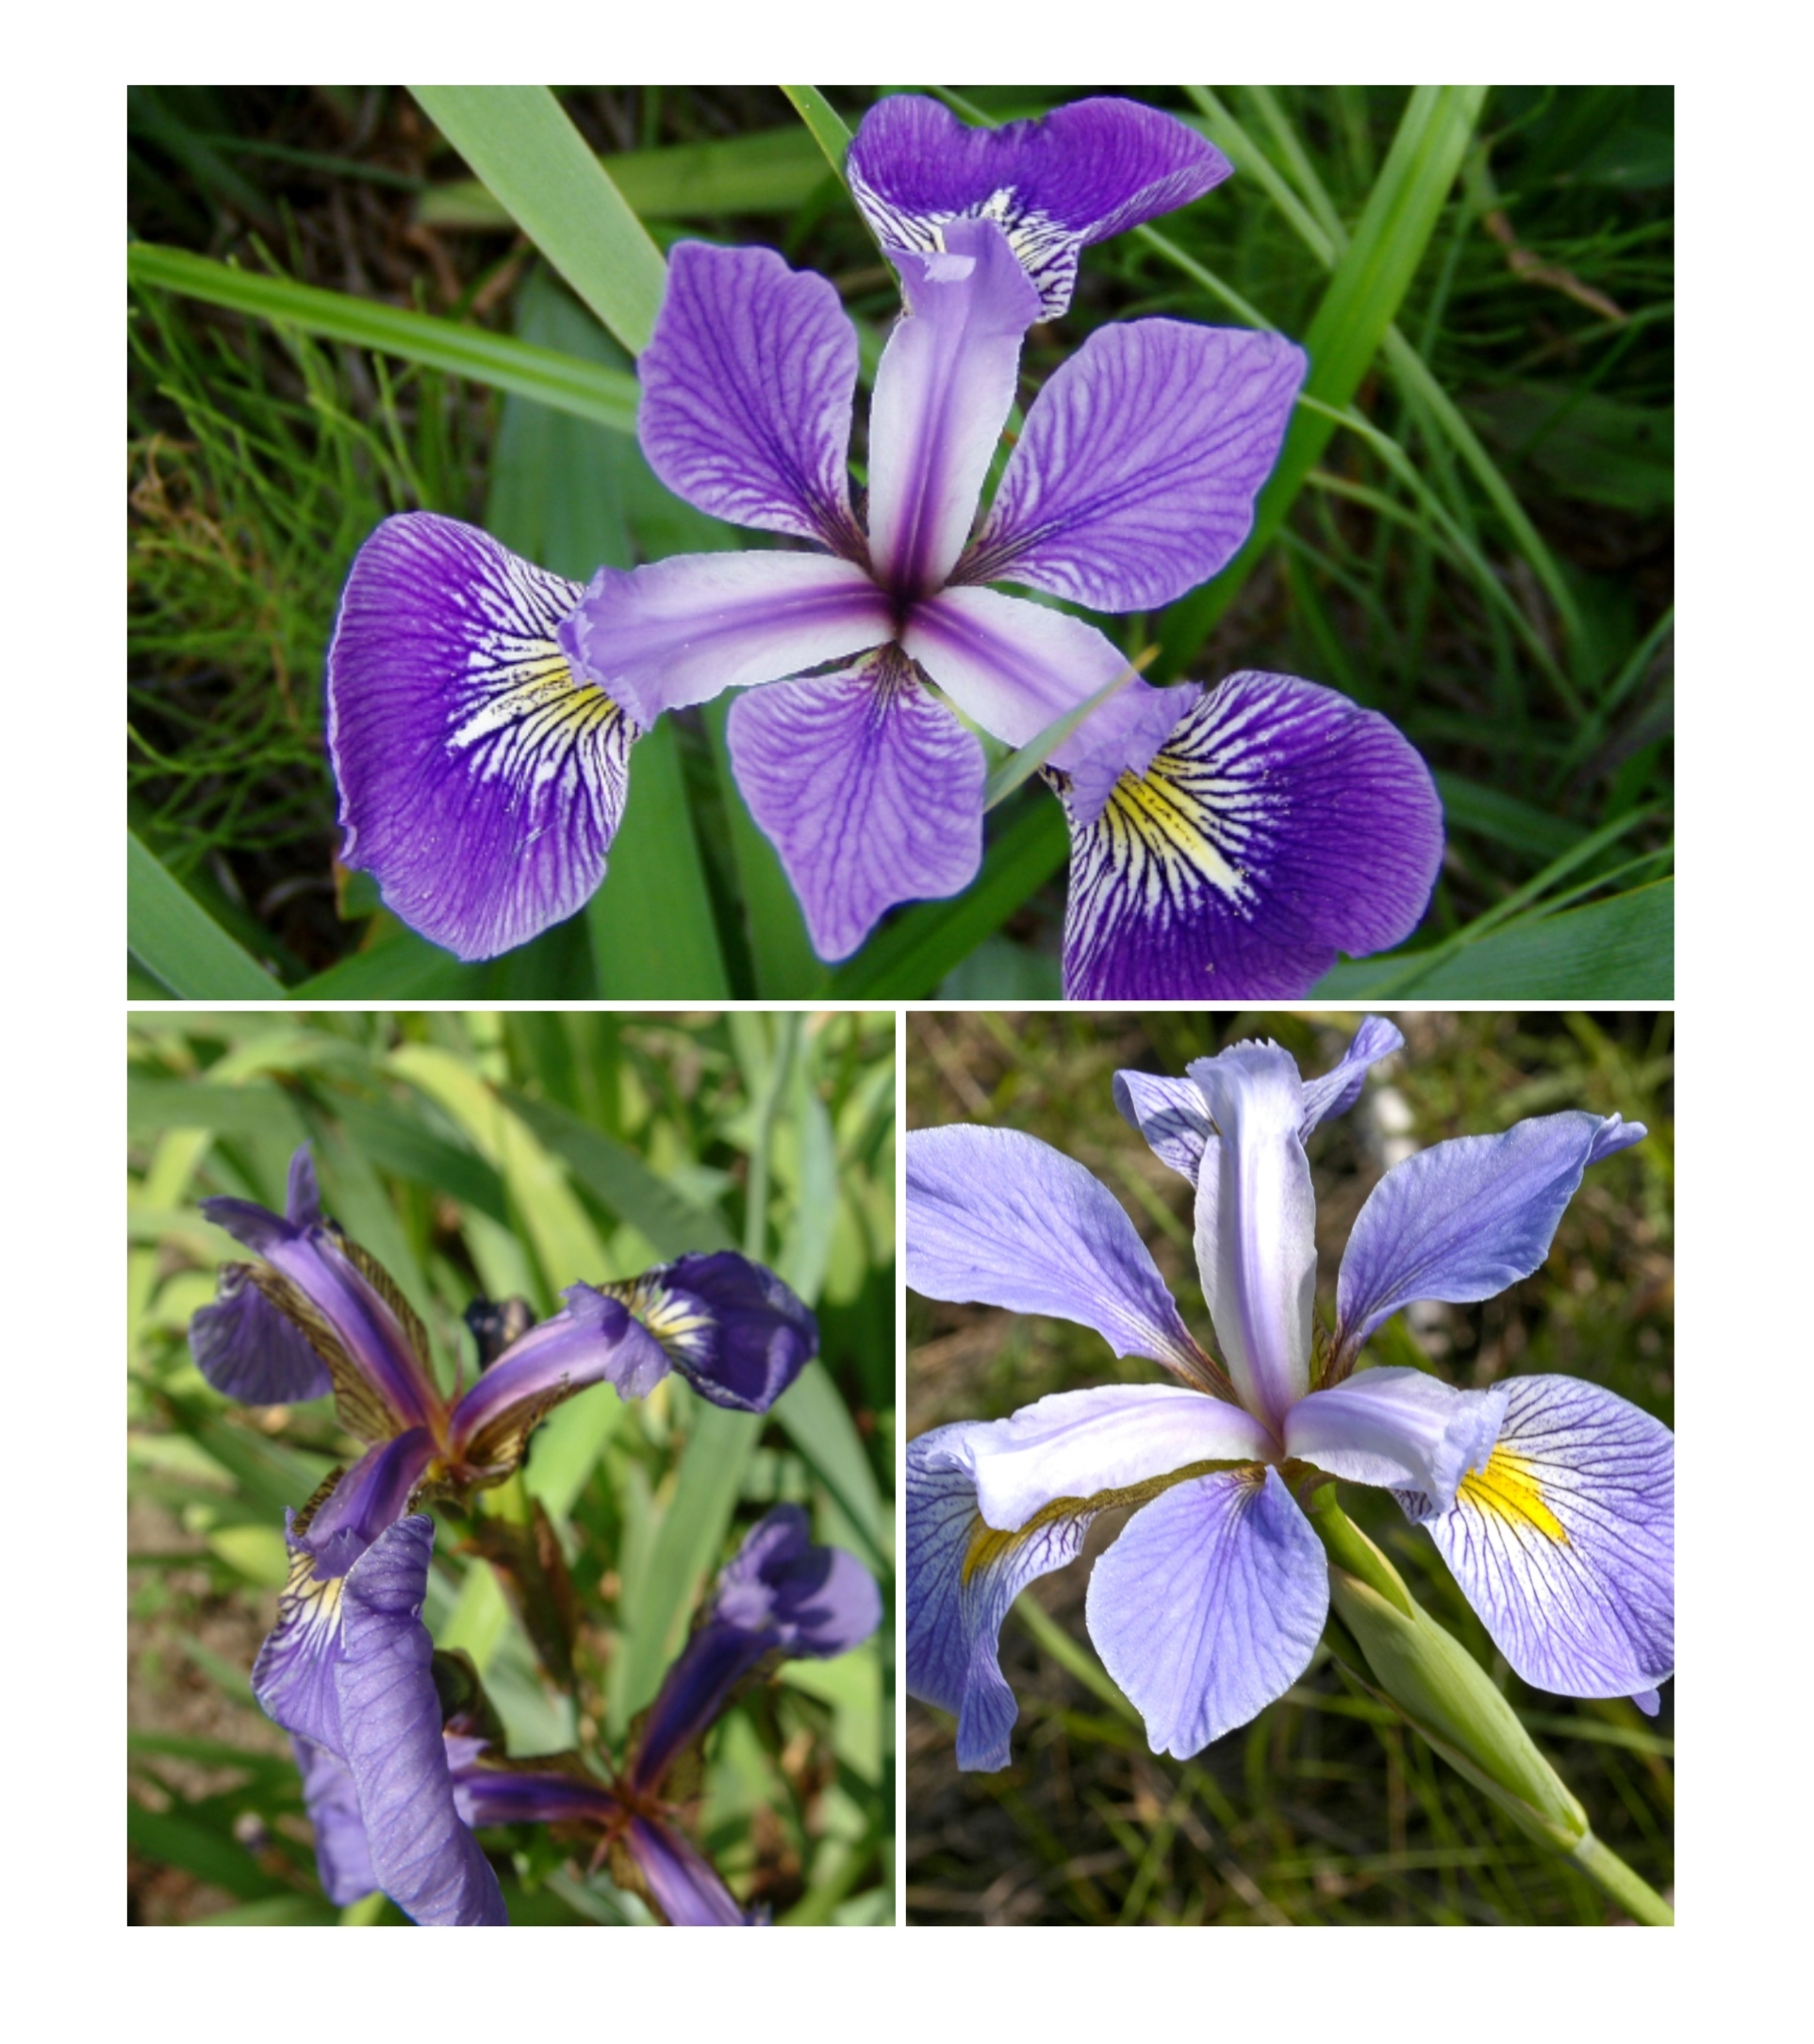

# step1 - Importing and Checking data

In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
# Importing dataset
data = pd.read_csv(r'C:\Users\HP\Desktop\KOMAL\DATA\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# to check distinct values in column
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# to check number of  values in column
data["Species"].nunique()

3

In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# step2 - Data Visualization

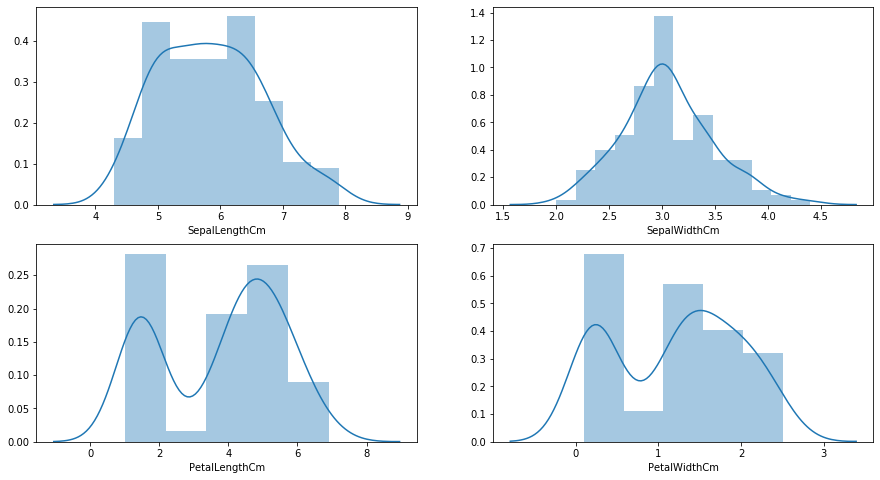

In [12]:
# Distribution plot of all the continious variables in the dataset
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.distplot(data["SepalLengthCm"])

plt.subplot(2,2,2)
sns.distplot(data["SepalWidthCm"])

plt.subplot(2,2,3)
sns.distplot(data["PetalLengthCm"])

plt.subplot(2,2,4)
sns.distplot(data["PetalWidthCm"])

Observation

sepallenghtcm and sepalwidthcm are normaly distributed. PetalLengthCm and PetalWidthCm is kind of by model distribution 

Variables -PetalLengthCm and PetalWidthCm have chance of internal grouping.

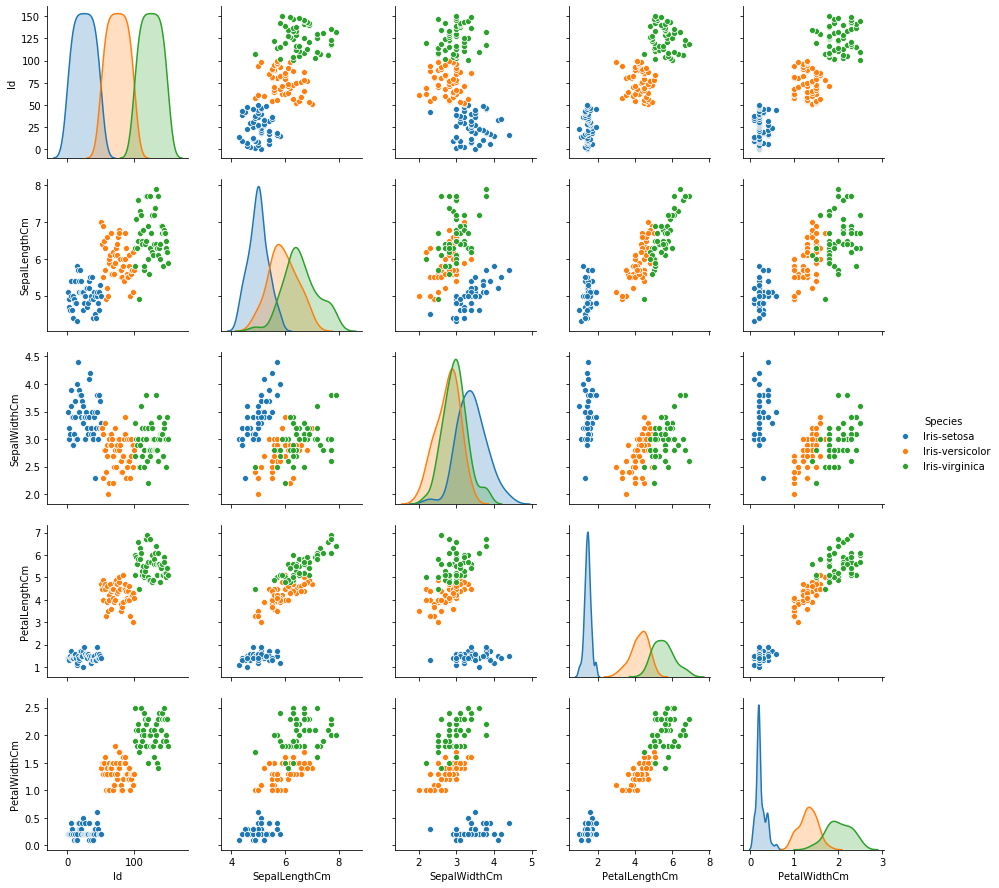

In [13]:
#pairplot of irirs dataset
sns.pairplot(data, hue = "Species")
plt.show()

from these plots we can observe that Iris-Setosa is having different characteristic in campariosn of Iris-versicolor and Iris-virginica.

whereas characteristics of Iris-versicolor and Iris-virginica are overlaping.

# preparing data

In [14]:
# selecting the coulumns which are required for the further analysis
X = data.iloc[:, [1, 4]].values

In [15]:
X

array([[5.1, 0.2],
       [4.9, 0.2],
       [4.7, 0.2],
       [4.6, 0.2],
       [5. , 0.2],
       [5.4, 0.4],
       [4.6, 0.3],
       [5. , 0.2],
       [4.4, 0.2],
       [4.9, 0.1],
       [5.4, 0.2],
       [4.8, 0.2],
       [4.8, 0.1],
       [4.3, 0.1],
       [5.8, 0.2],
       [5.7, 0.4],
       [5.4, 0.4],
       [5.1, 0.3],
       [5.7, 0.3],
       [5.1, 0.3],
       [5.4, 0.2],
       [5.1, 0.4],
       [4.6, 0.2],
       [5.1, 0.5],
       [4.8, 0.2],
       [5. , 0.2],
       [5. , 0.4],
       [5.2, 0.2],
       [5.2, 0.2],
       [4.7, 0.2],
       [4.8, 0.2],
       [5.4, 0.4],
       [5.2, 0.1],
       [5.5, 0.2],
       [4.9, 0.1],
       [5. , 0.2],
       [5.5, 0.2],
       [4.9, 0.1],
       [4.4, 0.2],
       [5.1, 0.2],
       [5. , 0.3],
       [4.5, 0.3],
       [4.4, 0.2],
       [5. , 0.6],
       [5.1, 0.4],
       [4.8, 0.3],
       [5.1, 0.2],
       [4.6, 0.2],
       [5.3, 0.2],
       [5. , 0.2],
       [7. , 1.4],
       [6.4, 1.5],
       [6.9,

# Using the elbow method to find the optimal number of clusters

Brief about the Elbow method:

In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wcss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the below plot indicates the appropiate number of clusters.

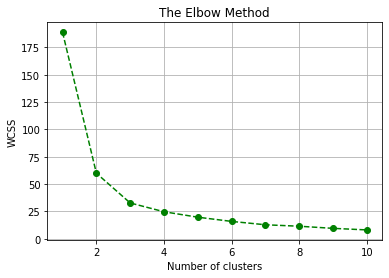

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'go--', color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

we can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

# Training the K-Means model on the dataset

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

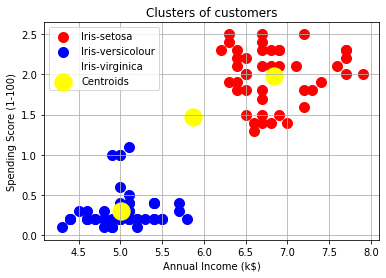

In [18]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 0, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

# THANK YOU 